# Raw vs clean analysis

This notebook aims at comparing the raw data vs the clean data to determine whether the cleaning process has been thorough enough.

## Cleaning process

### Correct for duplicate data points
- Using a triangulation error of 15m, find signals were a single device moves at an unrealistic speed
- Remove one of the signals by determining which one is most probable

### Seperate devices which are shoppers and non-shoppers
- The signals were grouped into mac addresses (which relate to a device and, therefore, a shopper)
- The features (characteristics) were extracted from the list of signals for each mac address e.g. average velocity
- Distribution (of all the mac addresses) were found for each feature
- The distributions were found for devices which were definitely not shoppers (present during the hours between 3am to 5am); furthermore, the distributions of all other devices which were called shoppers
- Sequential Bayesian Inference was performed on both distribution for the shoppers and non-shoppers determine the probability that each device is in either group
- A 5% confidence threshold was set that device was a shopper or non-shopper; all other devices were classed as unknown

## Load dependencies

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

from msci.utils import utils, plot

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import warnings
warnings.simplefilter("ignore")

## Import data

In [5]:
raw_signal_df = utils.import_signals('Mall of Mauritius', version=1)
signal_df = utils.import_signals('Mall of Mauritius')

In [6]:
mac_address_df = utils.import_mac_addresses()

## Investigation

We will investigate the issues found with our initial data. Thse include:
-  `Devices out of hours`: the opening hours of the mall are between 9am and 10pm; a considerable amount of devices were found out of these hours which leads us to believe that there are extra signals interfering with the dataset
- `Speed of devices`: some devices were able to move faster than humanly possible; taking into account the uncertainty in triangulation, the most unlikely signal, when this occurs, has been removed

### Devices out of hours

This distribution shows how many devices were in the store throughout the day with each line showing the a different devices.

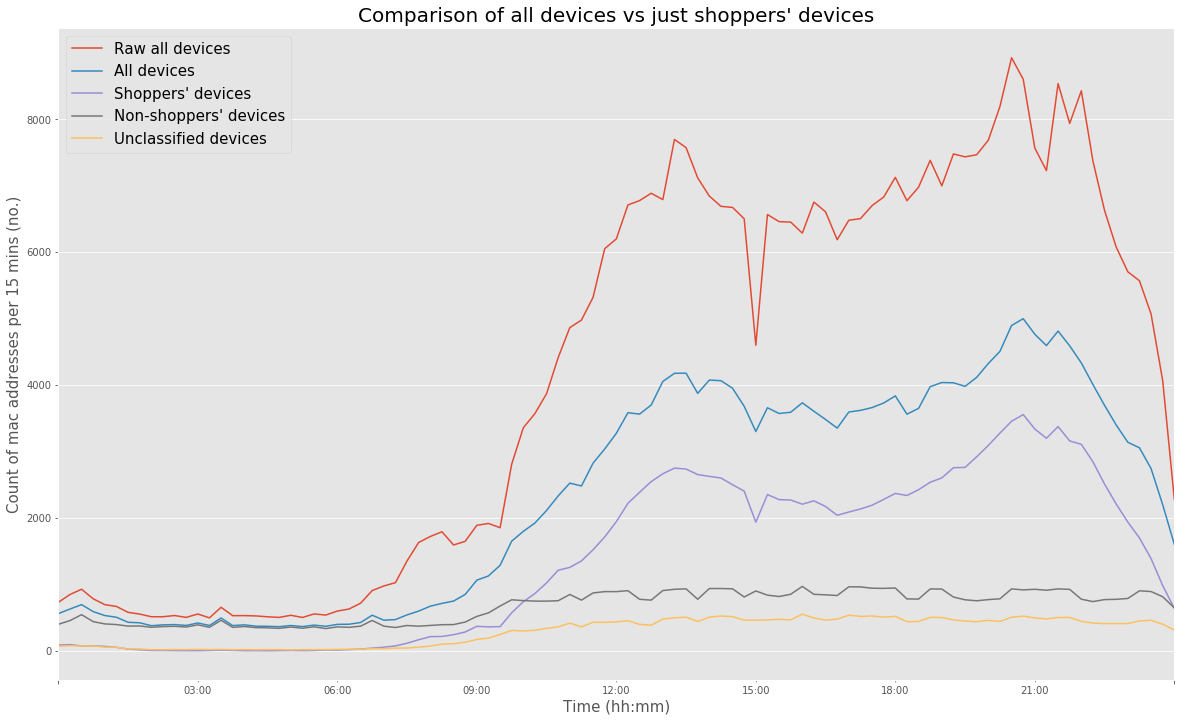

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

plot.plot_histogram_jn(raw_signal_df, axes=ax, label='Raw all devices')

plot.plot_histogram_jn(signal_df, axes=ax, label='All devices')

shopper_macs = mac_address_df[mac_address_df.shopper_label == 1].mac_address.tolist()
plot.plot_histogram_jn(signal_df[signal_df.mac_address.isin(shopper_macs)], axes=ax, label='Shoppers\' devices')

non_shopper_macs = mac_address_df[mac_address_df.shopper_label == 0].mac_address.tolist()
plot.plot_histogram_jn(signal_df[signal_df.mac_address.isin(non_shopper_macs)], axes=ax, label='Non-shoppers\' devices')

unclassified_macs = mac_address_df[mac_address_df.shopper_label == 0.5].mac_address.tolist()
plot.plot_histogram_jn(signal_df[signal_df.mac_address.isin(unclassified_macs)], axes=ax, label='Unclassified devices')

ax.set_title('Comparison of all devices vs just shoppers\' devices', fontsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=15)
ax.set_ylabel(ax.get_ylabel(), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.legend(fontsize=15);

Almost all of the shoppers' devices are now within hours.

In [27]:
print(
    'There are {} devices detected which are broken down into: \n \
    - {} shoppers \n \
    - {} non-shoppers \n \
    - {} unclassified'.format(len(mac_address_df), len(shopper_macs), len(non_shopper_macs), len(unclassified_macs))
)

There are 18719 devices detected which are broken down into: 
     - 16546 shoppers 
     - 1166 non-shoppers 
     - 1007 unclassified


### Location of the manufacturers

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
plot.plot_path_jn(signal_df, mac_address_df.mac_address[mac_address_df.manufacturer.isin(manufacturer)][:20], axes=axes, scatter=True)
fig.set_size_inches(20, 10.5)